<a href="https://colab.research.google.com/github/nsharma73/capstone_haystack/blob/main/Capstone_Project_PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - GA Real Estate - PCA Analysis and Clustering**

*By Liliya Lopez*

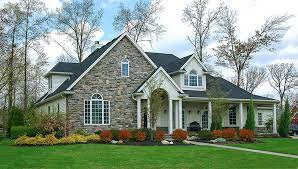

## **1.Introduction**

#####**Libraries used**

In [829]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [830]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from statsmodels.multivariate.pca import PCA
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point


##### **Import datasets**

In [831]:
from google.colab import drive

In [832]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [833]:
completed_data = pd.read_csv('drive/MyDrive/Colab Notebooks/zillow_schools_tax_dataV2.csv', index_col=0)
pd.set_option('display.max_columns', 20)
completed_data.reset_index(inplace=True)
completed_data.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,address,city,state,...,other_crime_total_rate,Prop_Cond_Grp_New,Prop_Cond_Grp_Remodeled,Prop_Cond_Grp_Resale,Two_Car_Garage_0,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,101 College Street,Kingsland,Georgia,...,6.365,0,0,1,0,1,1,0,1,0
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,169 School House Creek Drive,Saint Marys,Georgia,...,6.815,0,0,1,1,0,1,0,1,0
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1621 Sandpiper Court,Saint Marys,Georgia,...,6.815,0,0,1,0,1,1,0,1,0
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,6.365,0,0,1,1,0,1,0,1,0
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,81 Ossabaw Way,Waverly,Georgia,...,7.125,1,0,0,0,1,1,0,1,0


In [834]:
sum(completed_data.duplicated())

0

In [835]:
completed_data.isnull().sum(axis=0)

rentZestimate                0
zestimate                    0
price_y                      0
PCT_CHG                      0
bathrooms                    0
bedrooms                     0
yearBuilt                    0
address                      0
city                         0
state                        0
zip                          0
latitude                     0
longitude                    0
livingArea                   0
Lot_Size_SqFt                0
Price_SqFt                   0
cap_rate                     0
Tot_Appl                     0
Tot_Comm_Feat                0
Page_Views                   0
Sch_Rat_Avg                  0
Sch_Dist_Avg                 0
sch_cnt                      0
Individuals_taxed            0
Income_per_return            0
Cap_gain                     0
Pension                      0
UE_claims                    0
Social_security              0
SB_income                    0
Student_loan_ded             0
RE_taxes                     0
PP_taxes

In [836]:
completed_data.shape

(4591, 47)

In [837]:
completed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rentZestimate              4591 non-null   float64
 1   zestimate                  4591 non-null   float64
 2   price_y                    4591 non-null   int64  
 3   PCT_CHG                    4591 non-null   float64
 4   bathrooms                  4591 non-null   int64  
 5   bedrooms                   4591 non-null   int64  
 6   yearBuilt                  4591 non-null   float64
 7   address                    4591 non-null   object 
 8   city                       4591 non-null   object 
 9   state                      4591 non-null   object 
 10  zip                        4591 non-null   int64  
 11  latitude                   4591 non-null   float64
 12  longitude                  4591 non-null   float64
 13  livingArea                 4591 non-null   float

In [838]:
georgia_map = gpd.read_file('drive/MyDrive/Colab Notebooks/Georgia_State_Boundary/Georgia_State_Boundary.shp')

## **2.PCA Analysis**

#####**Selecting numeric features**

In [839]:
num_features = completed_data.select_dtypes(include=['int64','float64'])
num_features.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,...,other_crime_total_rate,Prop_Cond_Grp_New,Prop_Cond_Grp_Remodeled,Prop_Cond_Grp_Resale,Two_Car_Garage_0,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,31548,30.804209,-81.653325,...,6.365,0,0,1,0,1,1,0,1,0
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,31558,30.767365,-81.588272,...,6.815,0,0,1,1,0,1,0,1,0
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,31558,30.746731,-81.633995,...,6.815,0,0,1,0,1,1,0,1,0
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,31548,30.791878,-81.676750,...,6.365,0,0,1,1,0,1,0,1,0
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,31565,31.104492,-81.604486,...,7.125,1,0,0,0,1,1,0,1,0


In [840]:
num_features.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'zip', 'latitude', 'longitude', 'livingArea',
       'Lot_Size_SqFt', 'Price_SqFt', 'cap_rate', 'Tot_Appl', 'Tot_Comm_Feat',
       'Page_Views', 'Sch_Rat_Avg', 'Sch_Dist_Avg', 'sch_cnt',
       'Individuals_taxed', 'Income_per_return', 'Cap_gain', 'Pension',
       'UE_claims', 'Social_security', 'SB_income', 'Student_loan_ded',
       'RE_taxes', 'PP_taxes', 'Child_credit', 'Earned_Inc_credit',
       'violent_crime_total_rate', 'property_crime_total_rate',
       'other_crime_total_rate', 'Prop_Cond_Grp_New',
       'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale', 'Two_Car_Garage_0',
       'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1', 'HasHardwood_0',
       'HasHardwood_1'],
      dtype='object')

##### **Covariance matrix**

In [841]:
pca = PCA(num_features, standardize=True, method='eig')
normalized_dataset = pca.transformed_data

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [842]:
covariance_df = pd.DataFrame(data=np.cov(normalized_dataset, bias=True, rowvar=False), columns=num_features.columns)

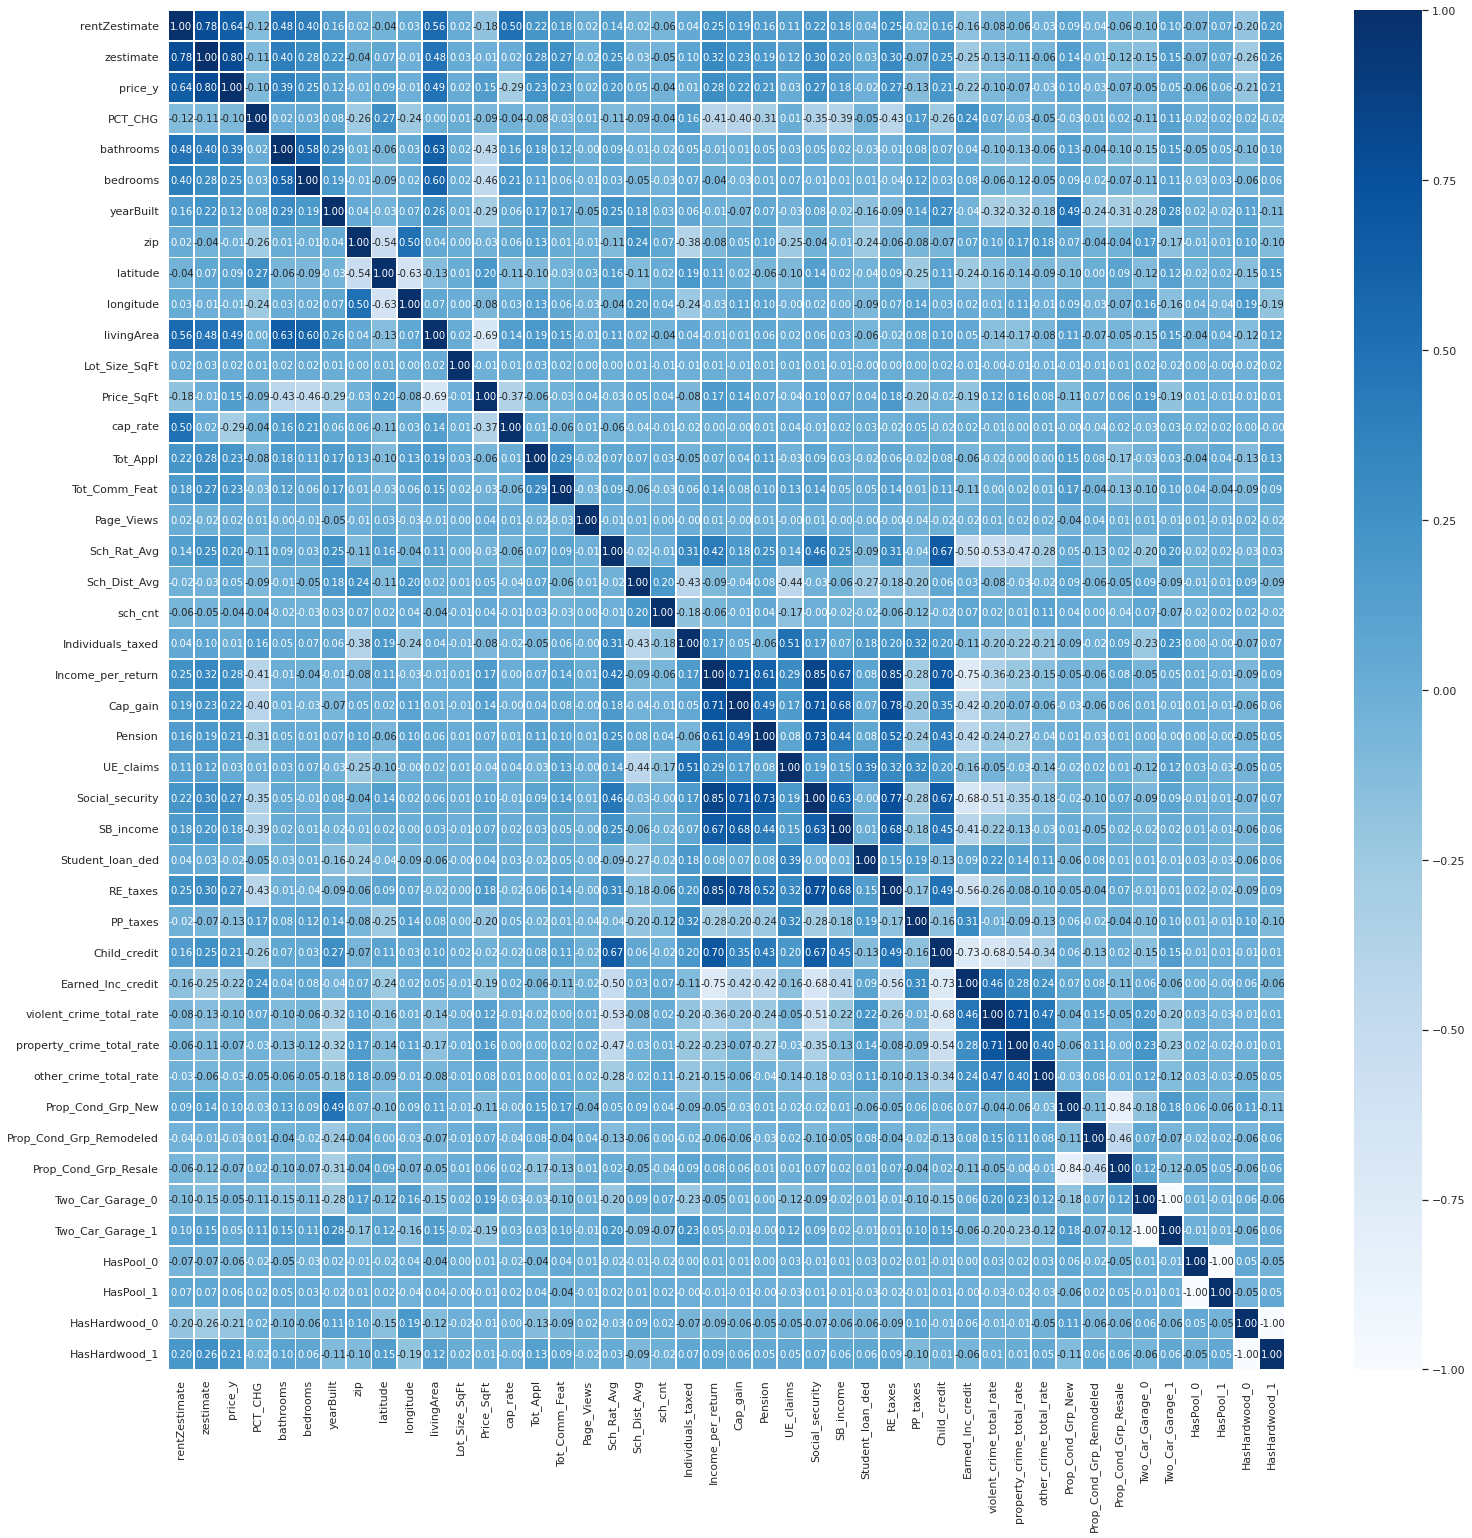

In [843]:
# Plot Covariance Matrix
plt.subplots(figsize=(25, 25))
sns.heatmap(covariance_df, cmap='Blues', linewidths=.7, annot=True, fmt='.2f', yticklabels=num_features.columns)
plt.show()


##### **Run PCA**

In [844]:
# Run PCA with eig method (eigenvectors of the covariance matrix become the components)
pca = PCA(num_features, standardize=True, method='eig')
components_df = pca.factors

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [845]:
components_df

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,...,comp_31,comp_32,comp_33,comp_34,comp_35,comp_36,comp_37,comp_38,comp_39,comp_40
0,0.006440,-0.006594,0.012322,0.028757,0.026712,-0.013491,-0.011090,0.016770,-0.036836,-0.020863,...,0.026896,-0.008740,0.000771,0.007056,-0.017870,-0.012001,0.003636,-0.009539,0.022148,-1.491050e-09
1,0.000986,-0.001362,0.027293,0.024628,0.033587,-0.033578,-0.000934,0.010642,-0.022167,0.003973,...,0.017574,-0.032409,0.009133,0.004137,-0.006158,0.017606,0.005484,-0.039192,0.049399,-1.022145e-09
2,-0.000276,0.002209,0.020609,0.029636,0.027384,-0.006842,-0.015778,0.021139,-0.042663,-0.027312,...,0.017097,-0.029586,0.006182,-0.004276,-0.008298,0.013969,0.007071,-0.039867,0.016692,7.196902e-11
3,0.009843,0.004268,0.016947,0.030954,0.024725,-0.021563,-0.005956,0.000673,-0.039782,-0.003984,...,0.029238,-0.007702,0.000597,0.003188,-0.024203,-0.011814,0.002392,-0.009427,0.025353,-3.969368e-10
4,-0.001383,0.005922,0.045644,0.050317,-0.008220,0.023239,-0.012965,0.032416,-0.017372,-0.016197,...,0.026431,-0.004990,-0.003021,-0.020876,-0.071020,0.010492,0.013198,-0.037257,-0.000115,1.791290e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,0.006306,0.019380,0.021603,0.004394,-0.032646,0.005490,0.014675,0.012675,-0.003079,-0.000066,...,0.042401,0.050892,0.005261,-0.024627,-0.044255,-0.032422,0.010262,-0.026465,-0.016408,1.039133e-09
4587,0.011798,0.007796,0.018485,-0.022003,0.004486,-0.023817,0.014952,0.017816,-0.004721,0.014645,...,-0.038456,0.019317,-0.014217,-0.021321,0.027263,0.001386,-0.037346,0.014418,-0.010112,3.696266e-09
4588,0.008485,-0.002702,0.027741,-0.031512,0.006215,-0.008522,0.004929,0.009519,0.012870,0.049245,...,-0.039514,0.012231,-0.004003,0.024082,0.023524,0.003965,0.009705,0.020653,-0.023751,8.828307e-10
4589,0.004157,0.001873,0.028589,-0.012550,-0.014618,-0.030211,0.030787,0.035478,0.028158,0.029439,...,0.027337,0.046980,0.015341,0.025552,-0.034024,-0.030225,-0.023809,-0.029775,0.037034,1.039133e-09


In [846]:
combined_df = pd.concat([num_features, components_df], axis=1)
correlation = combined_df.corr()

In [847]:
correlation_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

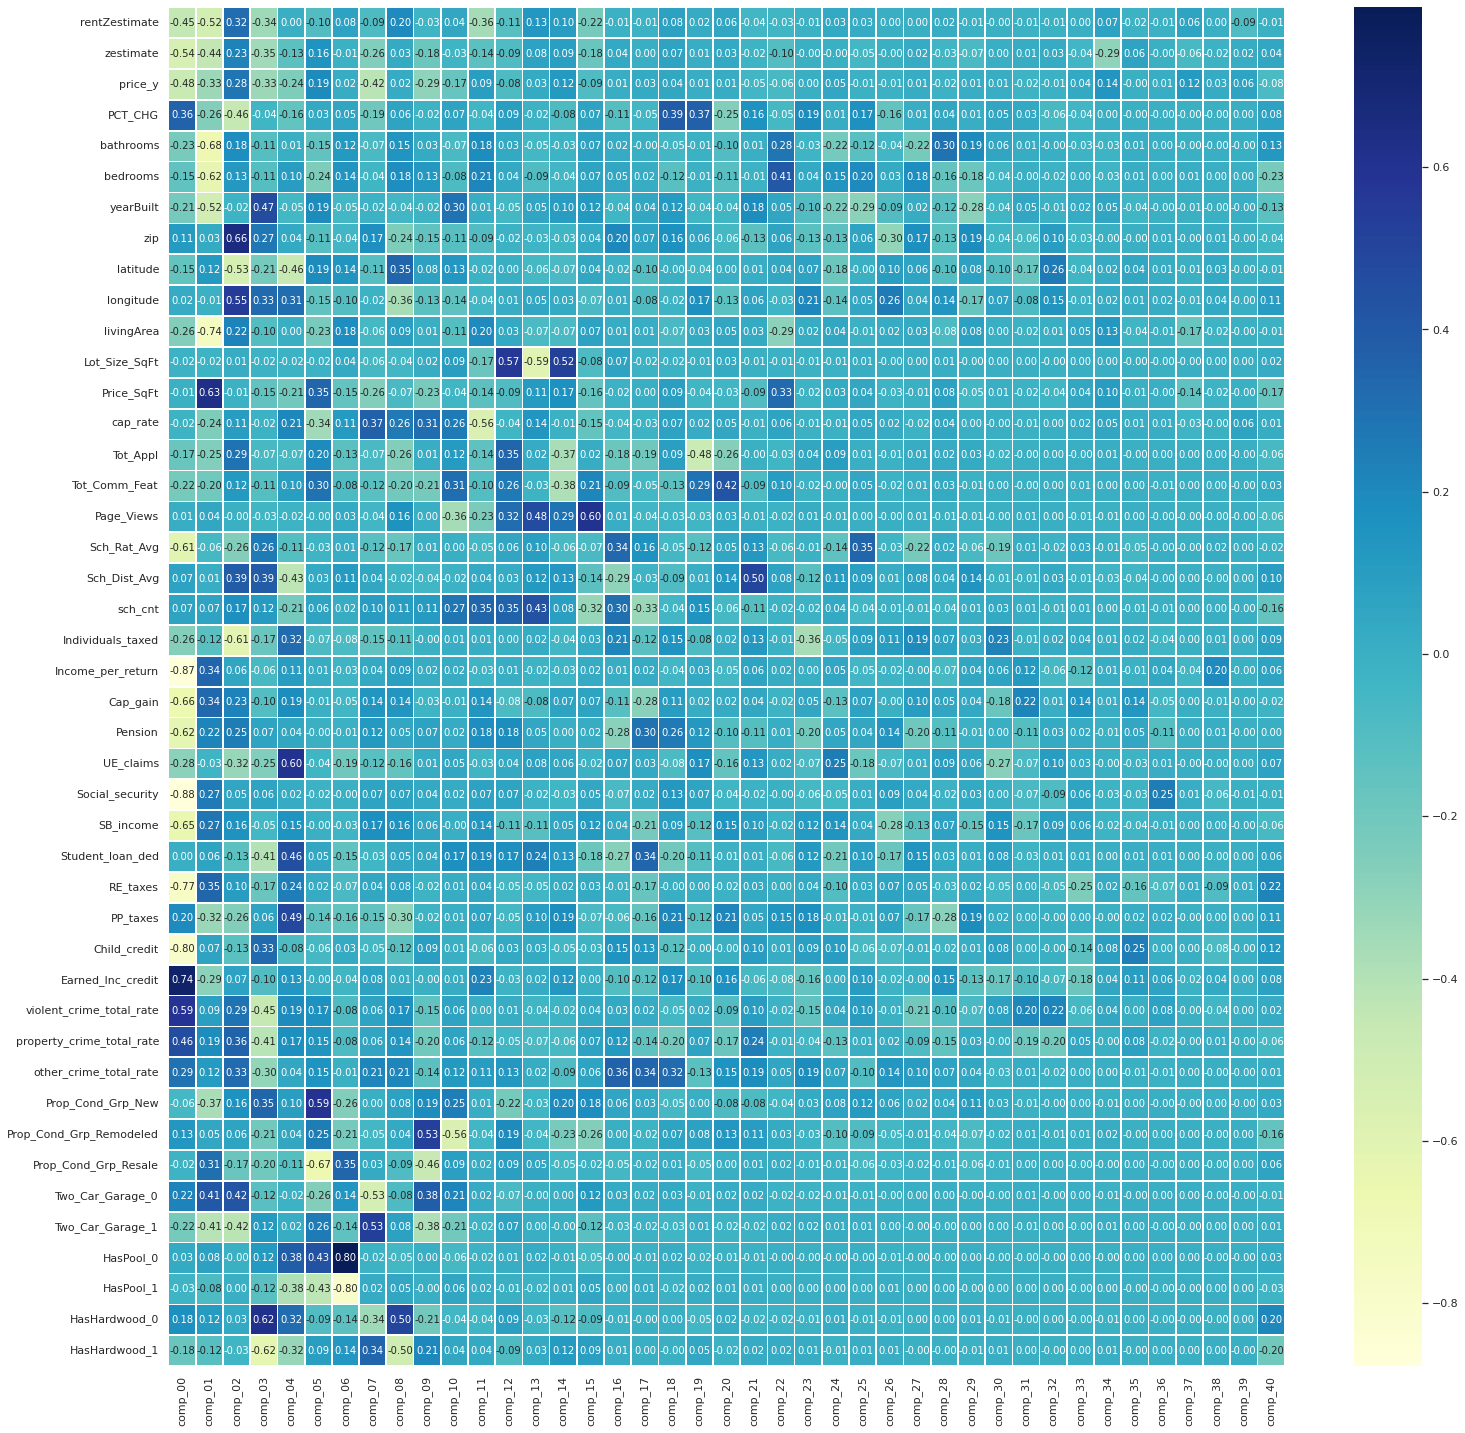

In [848]:
# plot correlation matrix
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(correlation_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In [849]:
pca = PCA(num_features, standardize=True, method='eig')
loadings = pca.loadings


/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [850]:
loadings

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,...,comp_31,comp_32,comp_33,comp_34,comp_35,comp_36,comp_37,comp_38,comp_39,comp_40
rentZestimate,-0.168268,-0.250768,0.172069,-0.195144,0.000210,-0.065511,0.055856,-0.067963,0.159230,-0.024000,...,-0.018327,-0.021721,0.000073,0.183288,-0.042297,-0.027547,0.234049,0.014611,-0.687850,-0.000000e+00
zestimate,-0.203929,-0.213432,0.126744,-0.198936,-0.085982,0.105760,-0.009873,-0.203835,0.021285,-0.151514,...,0.028169,0.052091,-0.105720,-0.728588,0.155483,-0.008682,-0.231531,-0.067120,0.138257,3.927027e-16
price_y,-0.178990,-0.158285,0.153416,-0.190776,-0.156508,0.130430,0.012368,-0.331347,0.017962,-0.248987,...,-0.043988,-0.026571,0.086840,0.360118,-0.013248,0.037735,0.422257,0.099463,0.504722,-1.606676e-16
PCT_CHG,0.135082,-0.123879,-0.248739,-0.022648,-0.101480,0.022837,0.039491,-0.153121,0.048473,-0.020440,...,0.065747,-0.127137,-0.095800,0.002647,-0.009395,-0.007223,-0.014208,-0.016192,0.002603,1.987691e-16
bathrooms,-0.085584,-0.325901,0.097067,-0.063881,0.003240,-0.100877,0.088390,-0.055131,0.120746,0.024790,...,0.025843,-0.000463,-0.060053,-0.063625,0.017317,0.004188,-0.009152,-0.002332,-0.000209,4.292498e-16
bedrooms,-0.055133,-0.300281,0.069730,-0.063389,0.062735,-0.164749,0.104275,-0.030723,0.147651,0.107435,...,-0.001733,-0.032386,0.009898,-0.069631,0.015453,0.003667,0.027335,0.006957,0.002918,-4.503167e-16
yearBuilt,-0.080090,-0.248677,-0.013120,0.267979,-0.032266,0.130372,-0.034639,-0.014407,-0.033510,-0.017841,...,0.093261,-0.017270,0.044649,0.134452,-0.098663,-0.011231,-0.021594,-0.003524,-0.005774,-4.731751e-16
zip,0.041735,0.013598,0.356769,0.156488,0.024055,-0.074744,-0.029361,0.135048,-0.198292,-0.126762,...,-0.128208,0.214622,-0.080889,-0.003967,-0.004219,0.022012,-0.001315,0.026444,-0.007189,1.860280e-17
latitude,-0.057260,0.058592,-0.289264,-0.122560,-0.296862,0.128959,0.105229,-0.089536,0.285732,0.067448,...,-0.342289,0.531032,-0.088384,0.059485,0.110293,0.039979,-0.026853,0.132017,-0.034070,1.031352e-16
longitude,0.007138,-0.004747,0.300480,0.190547,0.200293,-0.100370,-0.076000,-0.016012,-0.295394,-0.113197,...,-0.162336,0.302634,-0.023376,0.055446,0.037253,0.050989,-0.031652,0.140443,-0.005634,5.719712e-17


##### **Dimensionality reduction**

The traditional methods for picking factors include: 
- kaiser criterion
- explained variance
- scree plot 

**Kaiser criterion**

*With this approach we choose the principal components (factors) that have eigenvalues greater than 1.* 

In [851]:
pca = PCA(num_features, standardize=True, method='eig')
eigen_values = pd.DataFrame(data=pca.eigenvals.values, columns=['eigenvalue'])

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [852]:
eigen_values

,eigenvalue
0,3.258341e+04
1,1.974659e+04
2,1.560539e+04
3,1.393260e+04
4,1.110146e+04
5,9.980282e+03
6,8.644562e+03
7,7.239119e+03
8,6.931616e+03
9,6.422082e+03


**Explained variance**

*With this method, we choose the total amount of variance in the dataset you want principal amount components to encode (80 or 90%)*

In [853]:
pca = PCA(num_features, standardize=True, method='eig')

# Cumulative Variance Explained
cumulative_variance_explained = pd.DataFrame(data=pca.rsquare.values, columns=['cumulative_var'])

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [854]:
cumulative_variance_explained

,cumulative_var
0,0.000000
1,0.161301
2,0.259054
3,0.336307
4,0.405279
5,0.460236
6,0.509642
7,0.552436
8,0.588273
9,0.622587


- the first 18 components explain about 80% of variance 

- the first 24 component explain about 90% of variance in the dataset

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


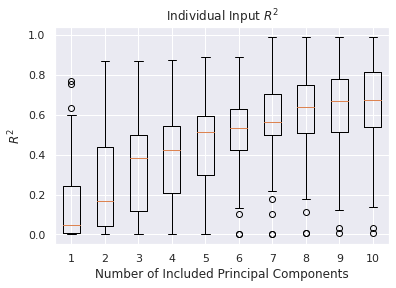

In [855]:
pca = PCA(num_features, standardize=True, method='eig')
pca.plot_rsquare()
plt.show()

**Scree plot**

*With this method we use the elbow method to determine the cut-off point*

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


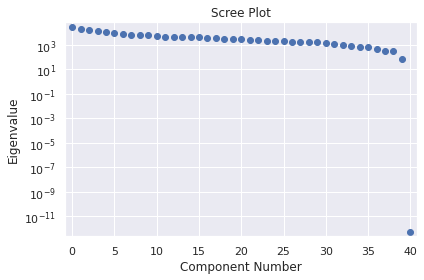

In [856]:
pca = PCA(num_features, standardize=True, method='eig')
pca.plot_scree()
plt.show()
#number of components #5? 

## **3.Combining PCA and K-means Clustering**

In [857]:
completed_data.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'address', 'city', 'state', 'zip', 'latitude',
       'longitude', 'livingArea', 'Lot_Size_SqFt', 'Price_SqFt', 'cap_rate',
       'Tot_Appl', 'Tot_Comm_Feat', 'Page_Views', 'Sch_Rat_Avg',
       'Sch_Dist_Avg', 'sch_cnt', 'Individuals_taxed', 'Income_per_return',
       'Cap_gain', 'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'violent_crime_total_rate',
       'property_crime_total_rate', 'other_crime_total_rate',
       'Prop_Cond_Grp_New', 'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale',
       'Two_Car_Garage_0', 'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1',
       'HasHardwood_0', 'HasHardwood_1'],
      dtype='object')

Text(0.5, 1.0, 'Visualization of Latitude vs Longitude')

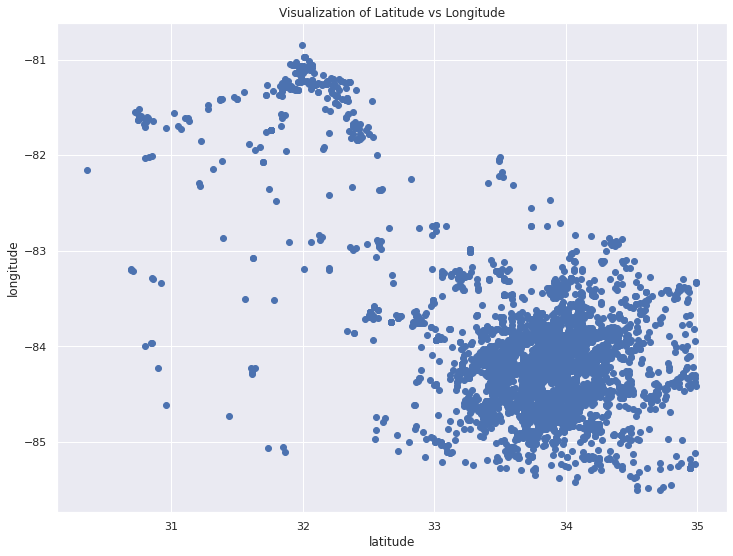

In [858]:
plt.figure(figsize = (12, 9))
plt.scatter(completed_data.latitude, completed_data.longitude)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title("Visualization of Latitude vs Longitude")

In [859]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [860]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(num_features)

In [861]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [862]:
first_ten_rations = pca.explained_variance_ratio_[0:10]
first_ten_rations

array([0.16130082, 0.09775345, 0.07725286, 0.06897192, 0.05495664,
       0.04940636, 0.04279401, 0.03583651, 0.03431425, 0.03179185])

Text(0, 0.5, 'Cumulative Explained Variance')

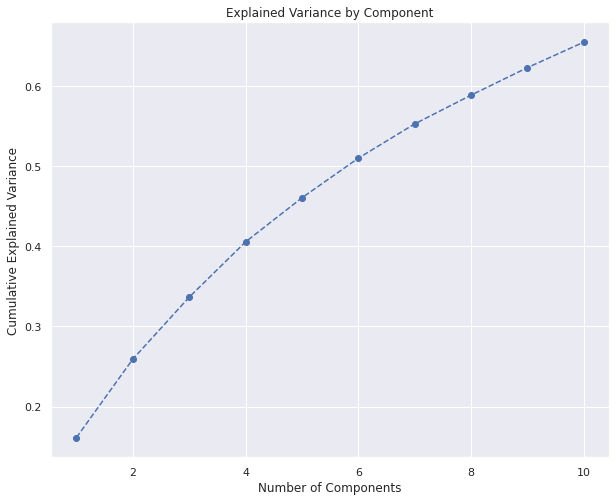

In [863]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), first_ten_rations.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


In [864]:
pca = PCA(n_components=4)

In [865]:
pca.fit(segmentation_std)

PCA(n_components=4)

In [866]:
pca.transform(segmentation_std)

array([[-1.1625464 , -0.92666926,  1.53927761, -3.39437986],
       [-0.1780122 , -0.19138803,  3.40953536, -2.90701446],
       [ 0.04982095,  0.31043852,  2.57452961, -3.49811128],
       ...,
       [-1.53160839, -0.37975281,  3.46538059,  3.71956161],
       [-0.75042451,  0.26321   ,  3.5713886 ,  1.48137804],
       [-3.54790432,  0.74246511,  3.08245469, -4.12647065]])

In [867]:
scores_pca = pca.transform(segmentation_std)

In [868]:
from sklearn.cluster import KMeans

In [869]:
sum_of_squares = [] #find summ of squares within cluster
for i in range(1, 21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  sum_of_squares.append(kmeans_pca.inertia_)

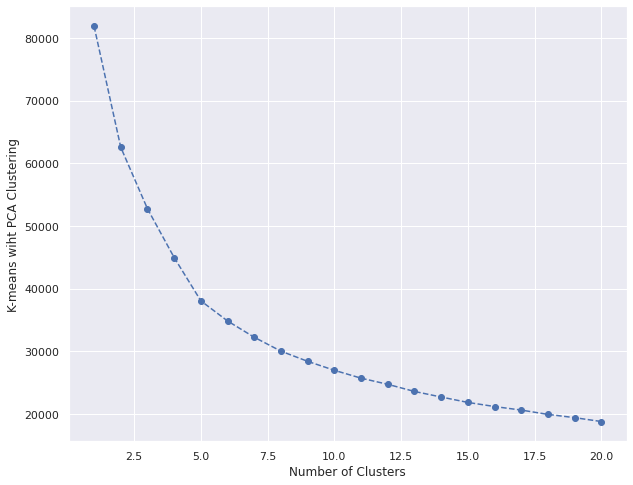

In [870]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), sum_of_squares, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-means wiht PCA Clustering')
plt.show()

In [871]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)

In [872]:
 kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [873]:
kmeans_pca.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [874]:
df_segm_pca_kmeans.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,address,city,state,...,HasPool_1,HasHardwood_0,HasHardwood_1,comp1,comp2,comp3,comp4,Segment K-means PCA,Segment,geometry
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,101 College Street,Kingsland,Georgia,...,0,1,0,-1.162546,-0.926670,1.539230,-3.394351,1,second,POINT (-81.65332 30.80421)
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,169 School House Creek Drive,Saint Marys,Georgia,...,0,1,0,-0.178012,-0.191393,3.409515,-2.907004,1,second,POINT (-81.58827 30.76737)
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1621 Sandpiper Court,Saint Marys,Georgia,...,0,1,0,0.049821,0.310431,2.574475,-3.498121,1,second,POINT (-81.63399 30.74673)
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,0,1,0,-1.776807,0.599752,2.117032,-3.653655,1,second,POINT (-81.67675 30.79188)
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,81 Ossabaw Way,Waverly,Georgia,...,0,1,0,0.249677,0.832163,5.701861,-5.939179,1,second,POINT (-81.60449 31.10449)


In [875]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth', 4: 'fifth'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


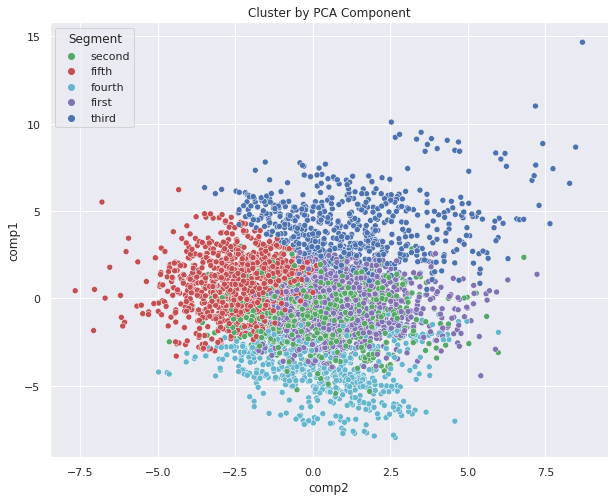

In [876]:
x_axis = df_segm_pca_kmeans['comp2']
y_axis = df_segm_pca_kmeans['comp1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c', 'm', 'b'])
plt.title('Cluster by PCA Component')
plt.show()

[Text(0.5, 1.0, 'Segmentation K-means')]

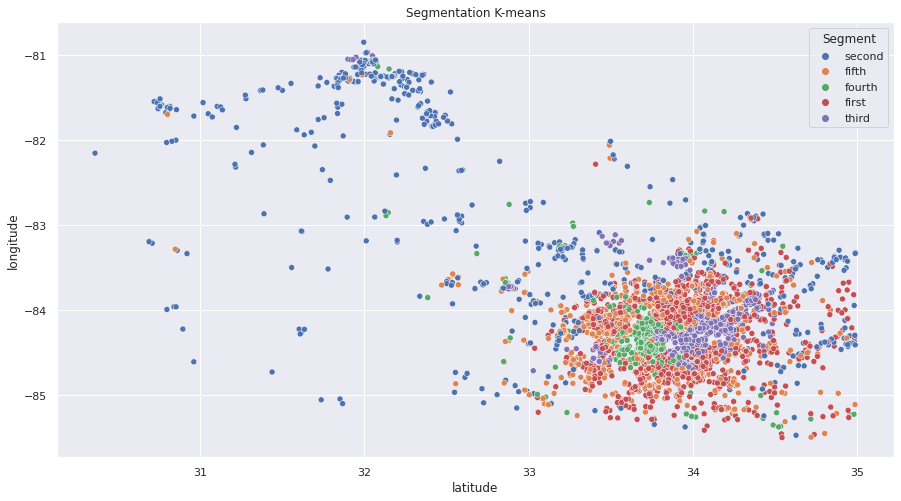

In [877]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = df_segm_pca_kmeans, x = 'latitude',  y = 'longitude', hue = 'Segment').set(title = "Segmentation K-means")

## **4. Plot clusters on the map**

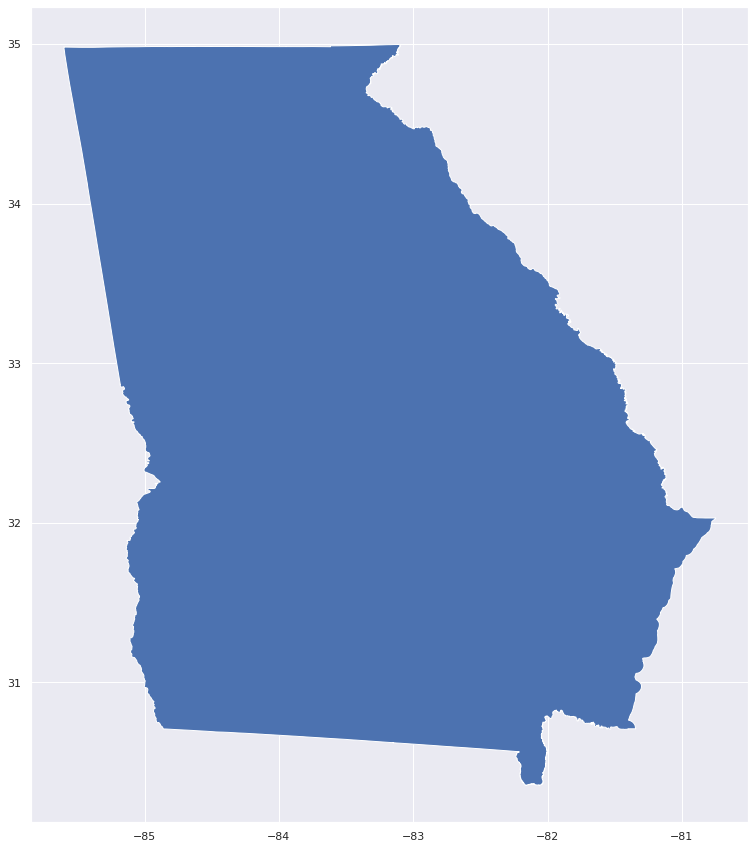

In [878]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax = ax)

In [879]:
df_map = df_segm_pca_kmeans
crs = {'init':'epsg:4326'}
df_map.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,address,city,state,...,HasPool_1,HasHardwood_0,HasHardwood_1,comp1,comp2,comp3,comp4,Segment K-means PCA,Segment,geometry
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,101 College Street,Kingsland,Georgia,...,0,1,0,-1.162546,-0.926670,1.539230,-3.394351,1,second,POINT (-81.65332 30.80421)
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,169 School House Creek Drive,Saint Marys,Georgia,...,0,1,0,-0.178012,-0.191393,3.409515,-2.907004,1,second,POINT (-81.58827 30.76737)
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1621 Sandpiper Court,Saint Marys,Georgia,...,0,1,0,0.049821,0.310431,2.574475,-3.498121,1,second,POINT (-81.63399 30.74673)
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,0,1,0,-1.776807,0.599752,2.117032,-3.653655,1,second,POINT (-81.67675 30.79188)
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,81 Ossabaw Way,Waverly,Georgia,...,0,1,0,0.249677,0.832163,5.701861,-5.939179,1,second,POINT (-81.60449 31.10449)


In [880]:
geometry = [Point(xy) for xy in zip (df_map['longitude'], df_map['latitude'])]
geometry[:3]

In [881]:
geo_df = gpd.GeoDataFrame(df_map, crs = crs, geometry = geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,address,city,state,...,HasPool_1,HasHardwood_0,HasHardwood_1,comp1,comp2,comp3,comp4,Segment K-means PCA,Segment,geometry
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,101 College Street,Kingsland,Georgia,...,0,1,0,-1.162546,-0.926670,1.539230,-3.394351,1,second,POINT (-81.65332 30.80421)
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,169 School House Creek Drive,Saint Marys,Georgia,...,0,1,0,-0.178012,-0.191393,3.409515,-2.907004,1,second,POINT (-81.58827 30.76737)
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1621 Sandpiper Court,Saint Marys,Georgia,...,0,1,0,0.049821,0.310431,2.574475,-3.498121,1,second,POINT (-81.63399 30.74673)
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,0,1,0,-1.776807,0.599752,2.117032,-3.653655,1,second,POINT (-81.67675 30.79188)
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,81 Ossabaw Way,Waverly,Georgia,...,0,1,0,0.249677,0.832163,5.701861,-5.939179,1,second,POINT (-81.60449 31.10449)


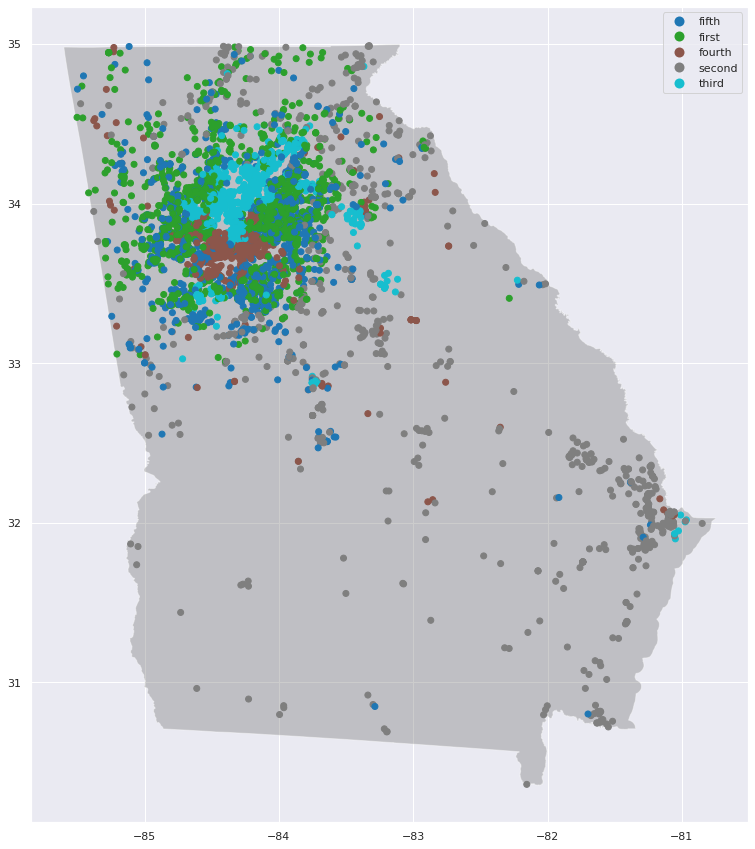

In [882]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df.plot(column = 'Segment', ax=ax, legend = True, label = "Segmentation")


In [883]:
geo_df.Segment.value_counts()

first     1403
fifth     1123
second     783
third      650
fourth     632
Name: Segment, dtype: int64

## **5. Clusters Analysis**

In [884]:
df_segm_pca_kmeans.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'address', 'city', 'state', 'zip', 'latitude',
       'longitude', 'livingArea', 'Lot_Size_SqFt', 'Price_SqFt', 'cap_rate',
       'Tot_Appl', 'Tot_Comm_Feat', 'Page_Views', 'Sch_Rat_Avg',
       'Sch_Dist_Avg', 'sch_cnt', 'Individuals_taxed', 'Income_per_return',
       'Cap_gain', 'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'violent_crime_total_rate',
       'property_crime_total_rate', 'other_crime_total_rate',
       'Prop_Cond_Grp_New', 'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale',
       'Two_Car_Garage_0', 'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1',
       'HasHardwood_0', 'HasHardwood_1', 'comp1', 'comp2', 'comp3', 'comp4',
       'Segment K-means PCA', 'Segment', 'geometry'],
      dtype='object')

In [885]:
df1 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'first']
df2 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'second']
df3 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'third']
df4 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'fourth']
df5 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'fifth']

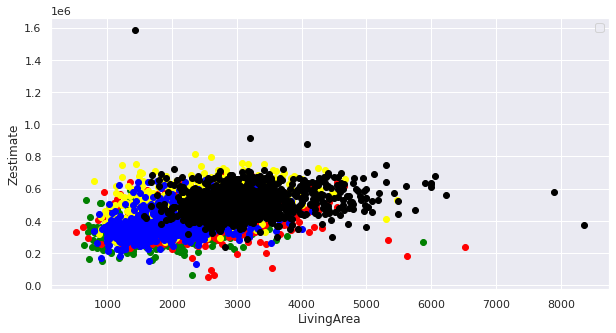

In [886]:
plt.figure(figsize = (10,5))

plt.scatter(df1['livingArea'], df1['zestimate'], color = 'green')
plt.scatter(df2['livingArea'], df2['zestimate'], color = 'red')
plt.scatter(df3['livingArea'], df3['zestimate'], color = 'yellow')
plt.scatter(df4['livingArea'], df4['zestimate'], color='blue')
plt.scatter(df5['livingArea'], df5['zestimate'], color='black')


plt.xlabel('LivingArea')
plt.ylabel('Zestimate')
plt.legend()

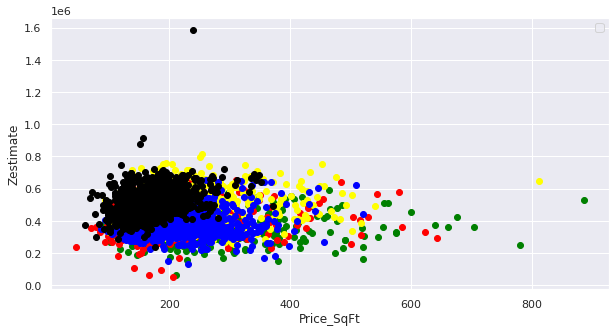

In [887]:
plt.figure(figsize = (10,5))

plt.scatter(df1['Price_SqFt'], df1['zestimate'], color = 'green')
plt.scatter(df2['Price_SqFt'], df2['zestimate'], color = 'red')
plt.scatter(df3['Price_SqFt'], df3['zestimate'], color = 'yellow')
plt.scatter(df4['Price_SqFt'], df4['zestimate'], color='blue')
plt.scatter(df5['Price_SqFt'], df5['zestimate'], color='black')


plt.xlabel('Price_SqFt')
plt.ylabel('Zestimate')
plt.legend()

In [888]:
completed_data.describe()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,...,other_crime_total_rate,Prop_Cond_Grp_New,Prop_Cond_Grp_Remodeled,Prop_Cond_Grp_Resale,Two_Car_Garage_0,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1
count,4591.000000,4.591000e+03,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,...,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000
mean,2490.589466,4.290687e+05,438127.563494,0.144729,2.945763,3.801133,1992.539220,30363.465694,33.706610,-84.040594,...,9.006819,0.165323,0.055761,0.778915,0.576127,0.423873,0.979961,0.020039,0.512525,0.487475
std,605.454472,1.058145e+05,94015.582284,0.033895,0.877148,0.936483,26.328306,509.686647,0.650778,0.826645,...,7.034874,0.371513,0.229485,0.415023,0.494224,0.494224,0.140150,0.140150,0.499898,0.499898
min,145.000000,5.100000e+04,300000.000000,0.008691,1.000000,1.000000,1817.000000,30002.000000,30.361079,-85.502994,...,2.299000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2089.000000,3.503025e+05,359900.000000,0.128885,2.000000,3.000000,1978.000000,30083.000000,33.539404,-84.516594,...,4.913000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2394.000000,4.133285e+05,424900.000000,0.147230,3.000000,4.000000,1998.000000,30224.000000,33.827917,-84.208855,...,7.062000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2837.450000,4.968500e+05,499999.000000,0.162760,3.000000,4.000000,2015.000000,30523.000000,34.047747,-83.873284,...,10.680000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,10386.000000,1.587200e+06,650000.000000,0.286409,13.000000,12.000000,2023.000000,39854.000000,34.990492,-80.848741,...,111.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [889]:
df1.select_dtypes(include=['int64','float64']).median()

rentZestimate                  2120.000000
zestimate                    362400.000000
price_y                      375000.000000
PCT_CHG                           0.154711
bathrooms                         3.000000
bedrooms                          3.000000
yearBuilt                      1994.000000
zip                           30141.000000
latitude                         33.916042
longitude                       -84.243935
livingArea                     1854.000000
Lot_Size_SqFt                 21780.000000
Price_SqFt                      202.762431
cap_rate                          0.045137
Tot_Appl                          3.000000
Tot_Comm_Feat                     1.000000
Page_Views                       11.000000
Sch_Rat_Avg                       6.000000
Sch_Dist_Avg                      2.266667
sch_cnt                           3.000000
Individuals_taxed             36580.000000
Income_per_return                60.593813
Cap_gain                         13.548276
Pension    

In [890]:
df2.select_dtypes(include=['int64','float64']).median()

rentZestimate                  2349.000000
zestimate                    388300.000000
price_y                      410000.000000
PCT_CHG                           0.122731
bathrooms                         3.000000
bedrooms                          4.000000
yearBuilt                      2008.000000
zip                           31008.000000
latitude                         33.040561
longitude                       -83.328104
livingArea                     2316.000000
Lot_Size_SqFt                 30056.400000
Price_SqFt                      172.272727
cap_rate                          0.047580
Tot_Appl                          4.120204
Tot_Comm_Feat                     2.645161
Page_Views                        9.000000
Sch_Rat_Avg                       5.333333
Sch_Dist_Avg                      4.566667
sch_cnt                           3.000000
Individuals_taxed             13340.000000
Income_per_return                59.024719
Cap_gain                         14.360000
Pension    

In [891]:
df3.select_dtypes(include=['int64','float64']).median()

rentZestimate                  2745.000000
zestimate                    513000.000000
price_y                      500000.000000
PCT_CHG                           0.122164
bathrooms                         3.000000
bedrooms                          4.000000
yearBuilt                      1991.000000
zip                           30114.000000
latitude                         33.985843
longitude                       -84.305881
livingArea                     2281.000000
Lot_Size_SqFt                 15246.000000
Price_SqFt                      216.715298
cap_rate                          0.044509
Tot_Appl                          4.000000
Tot_Comm_Feat                     2.645161
Page_Views                       13.000000
Sch_Rat_Avg                       6.666667
Sch_Dist_Avg                      1.800000
sch_cnt                           3.000000
Individuals_taxed             37620.000000
Income_per_return               108.466032
Cap_gain                         25.143465
Pension    

In [892]:
df4.select_dtypes(include=['int64','float64']).median()

rentZestimate                  2149.000000
zestimate                    358900.000000
price_y                      374250.000000
PCT_CHG                           0.147660
bathrooms                         3.000000
bedrooms                          3.000000
yearBuilt                      1964.000000
zip                           30310.000000
latitude                         33.727819
longitude                       -84.399784
livingArea                     1815.000000
Lot_Size_SqFt                 13068.000000
Price_SqFt                      214.602831
cap_rate                          0.045050
Tot_Appl                          4.000000
Tot_Comm_Feat                     1.000000
Page_Views                       16.000000
Sch_Rat_Avg                       3.666667
Sch_Dist_Avg                      1.666667
sch_cnt                           3.000000
Individuals_taxed             26920.000000
Income_per_return                38.515964
Cap_gain                          6.030882
Pension    

In [893]:
df5.select_dtypes(include=['int64','float64']).median()

rentZestimate                  2884.570000
zestimate                    499002.000000
price_y                      498500.000000
PCT_CHG                           0.154711
bathrooms                         4.000000
bedrooms                          4.000000
yearBuilt                      2006.000000
zip                           30180.000000
latitude                         33.822201
longitude                       -84.172234
livingArea                     2964.000000
Lot_Size_SqFt                 17859.600000
Price_SqFt                      165.650407
cap_rate                          0.046409
Tot_Appl                          5.000000
Tot_Comm_Feat                     2.645161
Page_Views                       11.000000
Sch_Rat_Avg                       6.000000
Sch_Dist_Avg                      2.366667
sch_cnt                           3.000000
Individuals_taxed             36990.000000
Income_per_return                59.128614
Cap_gain                         13.507818
Pension    